# Curve Fits for Graduate Report Lab 4 Analog Amplifier Sensitivity

In [127]:
import numpy as np
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

In [128]:
base_data_path = './Data'

### Task 4B
Plot the measured noise vs tabulated output referred noise. Fit these results to what you would expect for a constant additive noise, in quadrature. Comment on the value of the constant term in the fit to your answer in 4B.6 and the general quality of the fit-does it have the expected shape, or not? Plot your fitted equation on the same graph as your data

In [129]:
sr560_m2k_noise = pd.read_csv(f'{base_data_path}/Part_B/SR560ExpectedVsActualOutputReferred.csv')
print(sr560_m2k_noise)

    Gain  SR560m Expected Noise (V/rtHz)  SR560m Measured Noise (V/rtHz)  \
0    100                    4.000000e-07                        0.000052   
1    200                    8.000000e-07                        0.000052   
2    500                    2.000000e-06                        0.000062   
3   1000                    4.000000e-06                        0.000056   
4   2000                    8.000000e-06                        0.000049   
5   5000                    2.000000e-05                        0.000085   
6  10000                    4.000000e-05                        0.000136   
7  20000                    8.000000e-05                        0.000252   
8  50000                    2.000000e-04                        0.000570   

   Broken SR560m Expected Noise (V/rtHz)  
0                           6.500000e-07  
1                           1.300000e-06  
2                           2.600000e-06  
3                           6.500000e-06  
4                       

In [130]:
def fit_funct(X, a, b):
    x= X
    return np.sqrt(x ** 2 * a**2 + b**2)

In [131]:
y_data = sr560_m2k_noise['SR560m Measured Noise (V/rtHz)']
print(f'Measured Values:\n{y_data}')
x_data = sr560_m2k_noise['Gain']
print(f'Gains:\n{x_data}')

params, _ = curve_fit(fit_funct, x_data, y_data)

# params, _ = curve_fit(fit_funct, x_data, y_data)
print(params)

noise_fit = fit_funct(x_data, params[0], params[1])
print(f'Fit Values:\n{noise_fit}')

Measured Values:
0    0.000052
1    0.000052
2    0.000062
3    0.000056
4    0.000049
5    0.000085
6    0.000136
7    0.000252
8    0.000570
Name: SR560m Measured Noise (V/rtHz), dtype: float64
Gains:
0      100
1      200
2      500
3     1000
4     2000
5     5000
6    10000
7    20000
8    50000
Name: Gain, dtype: int64
[1.15014311e-08 5.50456216e-05]
Fit Values:
0    0.000055
1    0.000055
2    0.000055
3    0.000056
4    0.000060
5    0.000080
6    0.000128
7    0.000237
8    0.000578
Name: Gain, dtype: float64


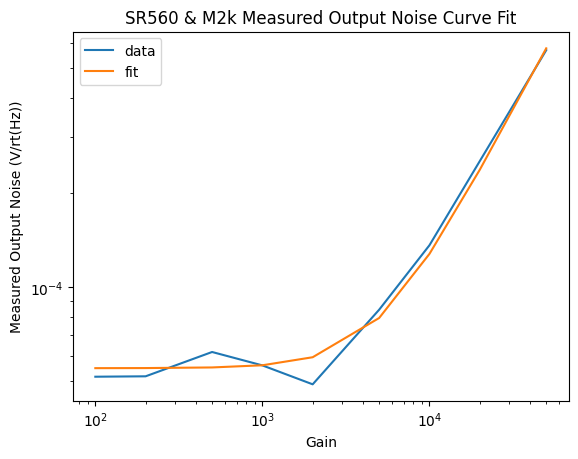

In [126]:
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Gain')
plt.ylabel('Measured Output Noise (V/rt(Hz))')
plt.title('SR560 & M2k Measured Output Noise Curve Fit')
plt.plot(x_data, y_data, label='data')
plt.plot(x_data, noise_fit, label='fit')
plt.legend()
plt.show()

# Task 4C Fits
4C.11) Fit the data of 4C.10 to the expected form. What are the fitting parameters and what do they signify?

4C.12) If you knew the system noise level very well, you could actually subtract it off from the measurements (appropriately) to get a rough estimate of the value of the noise source PSD even if it was close to the system noise. How might you go about this? Your answer to this question should be quantitative (include an equation), but I am most interested in reading about your thought process in approaching an open-ended question with minimal information provided to you- it is less important that you arrive at the right equation than that you have thought it through carefully and explain well.

In [64]:
ua741_data_path = f'{base_data_path}/Part_C'

In [66]:
ua741_avg_psd = pd.read_csv(f'{ua741_data_path}/UA741_Avg_PSD.csv')
print(ua741_avg_psd)

    UA741 Gains  Average Output PSD V/rt(Hz)  \
0             1                     0.000004   
1             2                     0.000004   
2             5                     0.000005   
3            10                     0.000007   
4            20                     0.000011   
5            50                     0.000026   
6           100                     0.000052   
7           200                     0.000102   
8           500                     0.000256   
9          1000                     0.000513   
10         2000                     0.001031   
11         5000                     0.002577   

    Average Input Referred PSD (V/rt(Hz))  
0                            4.050599e-06  
1                            2.130928e-06  
2                            9.838138e-07  
3                            6.521971e-07  
4                            5.605413e-07  
5                            5.212458e-07  
6                            5.170634e-07  
7                      

In [115]:
def ua741_fit(x, a, b):
    return np.sqrt(x**2 * a**2 + b**2)

In [116]:
y_data = ua741_avg_psd['Average Output PSD V/rt(Hz)']
print(f'Measured Values:\n{y_data}')
x_data = ua741_avg_psd['UA741 Gains']
print(f'Gains:\n{x_data}')

params, _ = curve_fit(ua741_fit, x_data, y_data)

# params, _ = curve_fit(fit_funct, x_data, y_data)
print(params)

noise_fit = ua741_fit(x_data, params[0], params[1])
print(f'Fit Values:\n{noise_fit}')

Measured Values:
0     0.000004
1     0.000004
2     0.000005
3     0.000007
4     0.000011
5     0.000026
6     0.000052
7     0.000102
8     0.000256
9     0.000513
10    0.001031
11    0.002577
Name: Average Output PSD V/rt(Hz), dtype: float64
Gains:
0        1
1        2
2        5
3       10
4       20
5       50
6      100
7      200
8      500
9     1000
10    2000
11    5000
Name: UA741 Gains, dtype: int64
[5.15285578e-07 4.08445422e-06]
Fit Values:
0     0.000004
1     0.000004
2     0.000005
3     0.000007
4     0.000011
5     0.000026
6     0.000052
7     0.000103
8     0.000258
9     0.000515
10    0.001031
11    0.002576
Name: UA741 Gains, dtype: float64


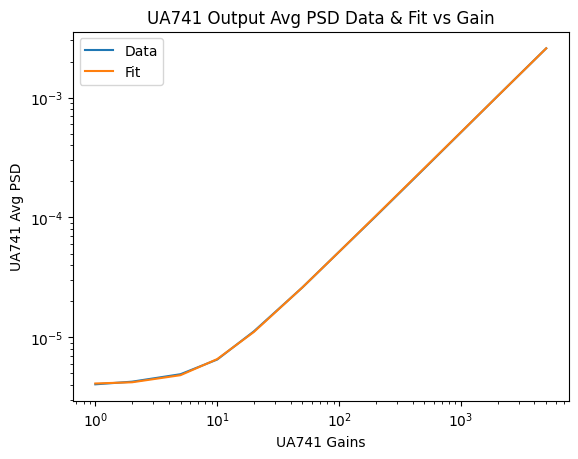

In [117]:
# Plot Average Output vs Gain
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('UA741 Gains')
plt.ylabel('UA741 Avg PSD')
plt.title('UA741 Output Avg PSD Data & Fit vs Gain')
plt.plot(ua741_avg_psd['UA741 Gains'], ua741_avg_psd['Average Output PSD V/rt(Hz)'], label='Data')
plt.plot(ua741_avg_psd['UA741 Gains'], noise_fit, label='Fit')
plt.legend()
plt.show()

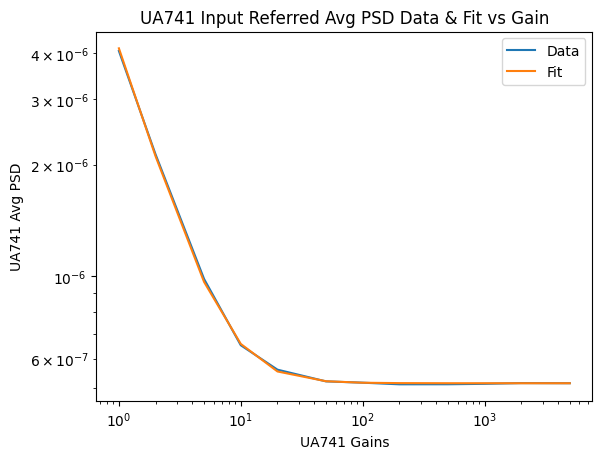

In [119]:
# Plot Average Input Referred vs Gain: I Just divided the fit values from the output by the gains
plt.figure()
plt.xscale('log')
plt.yscale('log')
plt.xlabel('UA741 Gains')
plt.ylabel('UA741 Avg PSD')
plt.title('UA741 Input Referred Avg PSD Data & Fit vs Gain')
plt.plot(ua741_avg_psd['UA741 Gains'], ua741_avg_psd['Average Input Referred PSD (V/rt(Hz))'], label='Data')
plt.plot(ua741_avg_psd['UA741 Gains'], noise_fit / ua741_avg_psd['UA741 Gains'], label='Fit')
plt.legend()
plt.show()

# Task 4D Fits
4D.17) Measure the slope of the excess noise. It will be, roughly, a 1/f^n function, where n is nominally 0.5 but is never exactly that value. For your report, fit the PSD to a function that is proportional to the 1/f^n at low frequencies and is frequency independent at high frequencies. The function will have properties similar to that of the single-pole roll-off function from Lab 3- but it will not be quite the same. From your data fits (non-linear regression), determine the values of the white noise PSD level, the 1/f_knee frequency, and n, for each EB